In [2]:
from patch_generator import smash_n_reconstruct
import filters as f
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers

In [3]:
rt1,pt1 = smash_n_reconstruct(input_path='./test_imgs/fake.png')
rt2,pt2 = smash_n_reconstruct(input_path='./test_imgs/real.jpg')

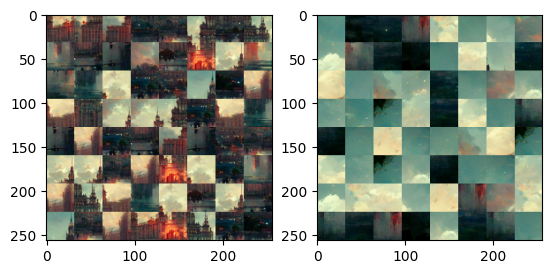

In [4]:
plt.subplot(1,2,1)
plt.imshow(rt1)
plt.subplot(1,2,2)
plt.imshow(pt1)
plt.show()

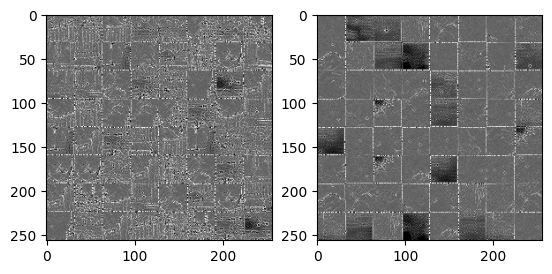

In [5]:
plt.subplot(1,2,1)
plt.imshow(f.apply_all_filters(rt1),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(f.apply_all_filters(pt1),cmap='gray')
plt.show()

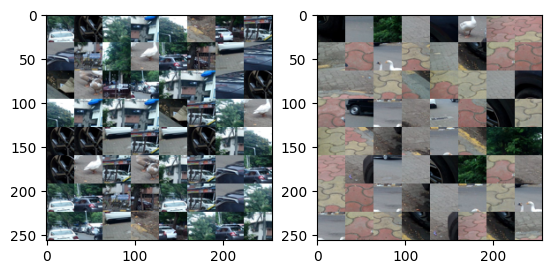

In [6]:
plt.subplot(1,2,1)
plt.imshow(rt2)
plt.subplot(1,2,2)
plt.imshow(pt2)
plt.show()

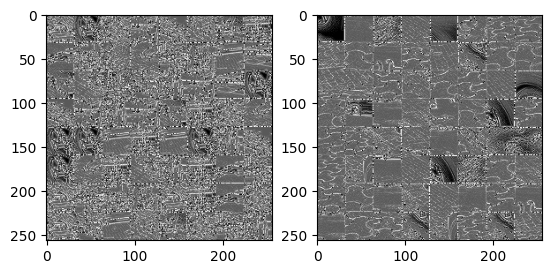

In [7]:
plt.subplot(1,2,1)
plt.imshow(f.apply_all_filters(rt2),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(f.apply_all_filters(pt2),cmap='gray')
plt.show()

In [8]:
def hard_tanh(x):
    return tf.clip_by_value(x,-1,1)

model = keras.Sequential([
        layers.Input(shape=(256,256,1)),
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.Lambda(hard_tanh)
    ])

model.compile(optimizer='adam',loss=keras.losses.BinaryCrossentropy,metrics=['accuracy'])
model.build()

In [9]:
a = tf.constant([f.apply_all_filters(rt2)])
b = tf.constant([f.apply_all_filters(pt2)])

In [18]:
(model.predict(a/255) - model.predict(b/255)).shape


1/1 [==============================] - 0s 45ms/step


(1, 254, 254, 32)

In [11]:
import gc

In [12]:
gc.collect()

24610

In [20]:
classifier = keras.Sequential([
        layers.Input(shape=(254,254,32)),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.AveragePooling2D(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.AveragePooling2D(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.AveragePooling2D(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        layers.Flatten(),
        layers.Dense(1,activation='sigmoid')
    ])

classifier.compile(
                    optimizer='adam',
                    loss=keras.losses.BinaryCrossentropy,
                    metrics=keras.metrics.binary_accuracy
                )

classifier.build()

In [21]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization_65 (Ba  (None, 252, 252, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_66 (Conv2D)          (None, 250, 250, 32)      9248      
                                                                 
 batch_normalization_66 (Ba  (None, 250, 250, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_67 (Conv2D)          (None, 248, 248, 32)      9248      
                                                                 
 batch_normalization_67 (Ba  (None, 248, 248, 32)     